In [1]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt

# Base directory containing the metrics
base_dir = "metrics"

# Initialize lists to hold all accuracies and losses
all_accuracies = []
all_losses = []
test_accuracies = []
test_losses = []

# Marker styles for each model
markers = ['o', 's', '^', 'D', 'v', 'X']

# Load training and test metrics
for i in range(1, 7):  # Numbers from 1 to 6
    folder_path = os.path.join(base_dir, f"model_{i}")
    
    # Load accuracies
    acc_file_path = os.path.join(folder_path, "accuracies.pkl")
    with open(acc_file_path, 'rb') as f:
        accuracies = pickle.load(f)
        all_accuracies.append(accuracies)
    
    # Load losses
    loss_file_path = os.path.join(folder_path, "losses.pkl")
    with open(loss_file_path, 'rb') as f:
        losses = pickle.load(f)
        all_losses.append(losses)

# Load test accuracies and losses
with open(os.path.join(base_dir, "test_acc.pkl"), 'rb') as f:
    test_accuracies = pickle.load(f)

with open(os.path.join(base_dir, "test_loss.pkl"), 'rb') as f:
    test_losses = pickle.load(f)


In [2]:
all_accuracies[0].append(0.5158)
all_accuracies[0].append(0.5172)

In [3]:
all_losses[0].append(1.587)
all_losses[0].append(1.576)

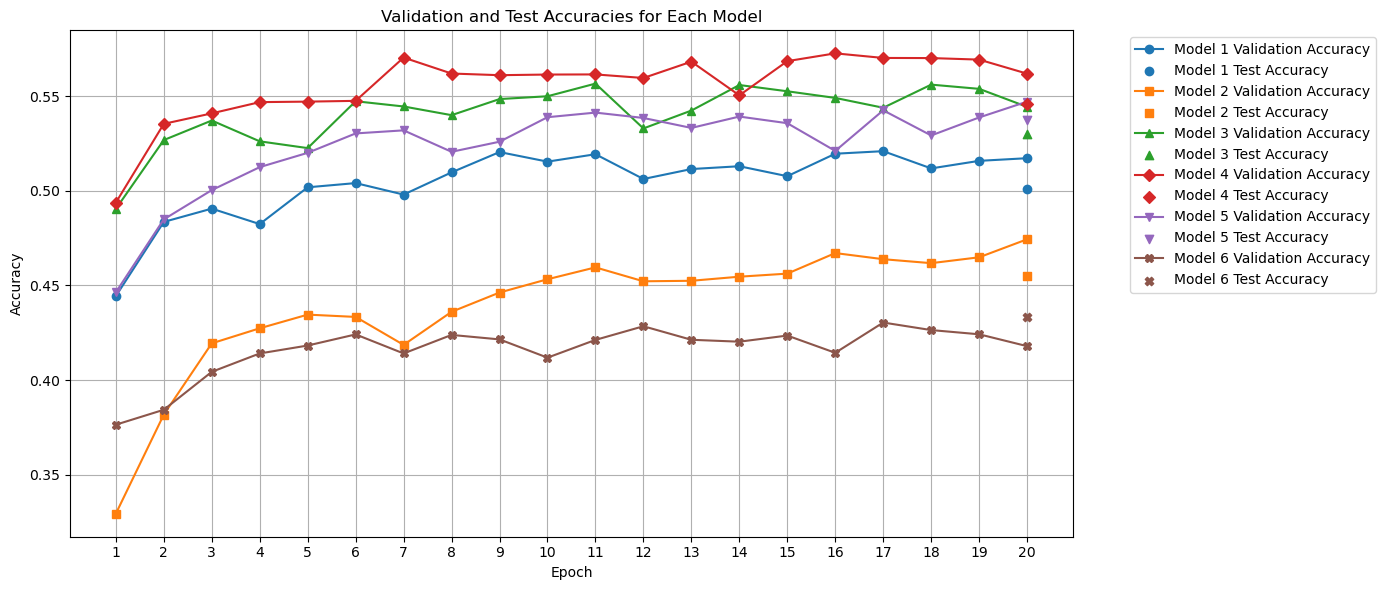

In [4]:
# Number of epochs (assuming all models have the same number of epochs)
epochs = len(all_accuracies[0])
epoch_range = np.arange(1, epochs + 1)

# Plot accuracies for each model
plt.figure(figsize=(14, 6))

for i, accuracies in enumerate(all_accuracies):
    plt.plot(epoch_range, accuracies, label=f"Model {i + 1} Validation Accuracy", marker=markers[i % len(markers)])
    # Add test accuracy point for the last epoch with the same marker and color
    plt.scatter(epochs, test_accuracies[i], color=plt.gca().lines[-1].get_color(), marker=markers[i % len(markers)], 
                label=f"Model {i + 1} Test Accuracy", zorder=5)

plt.title("Validation and Test Accuracies for Each Model")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.xticks(np.arange(1, min(epochs, 20) + 1, step=1))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.savefig("plots/accuracies_plot.png")
plt.show()


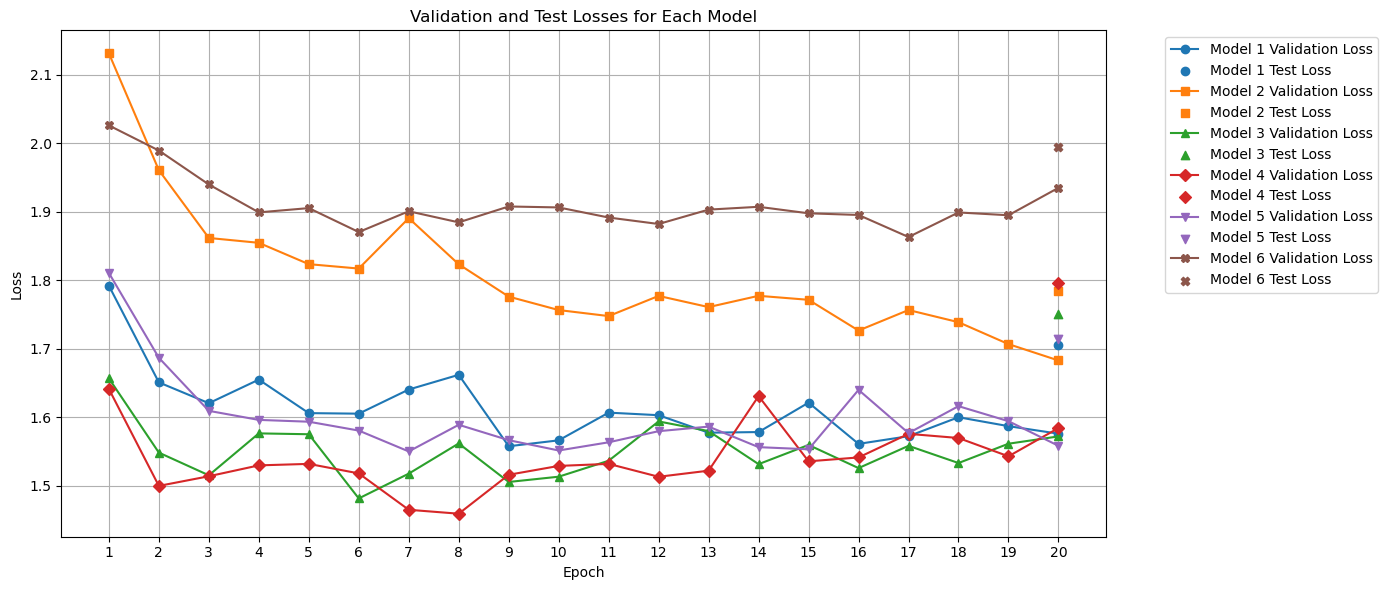

In [5]:
# Plot losses for each model
plt.figure(figsize=(14, 6))

for i, losses in enumerate(all_losses):
    plt.plot(epoch_range, losses, label=f"Model {i + 1} Validation Loss", marker=markers[i % len(markers)])
    # Add test loss point for the last epoch with the same marker and color
    plt.scatter(epochs, test_losses[i], color=plt.gca().lines[-1].get_color(), marker=markers[i % len(markers)], 
                label=f"Model {i + 1} Test Loss", zorder=5)

plt.title("Validation and Test Losses for Each Model")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.xticks(np.arange(1, min(epochs, 20) + 1, step=1))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.savefig("plots/losses_plot.png")
plt.show()

In [6]:
with open(os.path.join(base_dir, "time_taken.pkl"), 'rb') as f:
    time = pickle.load(f)

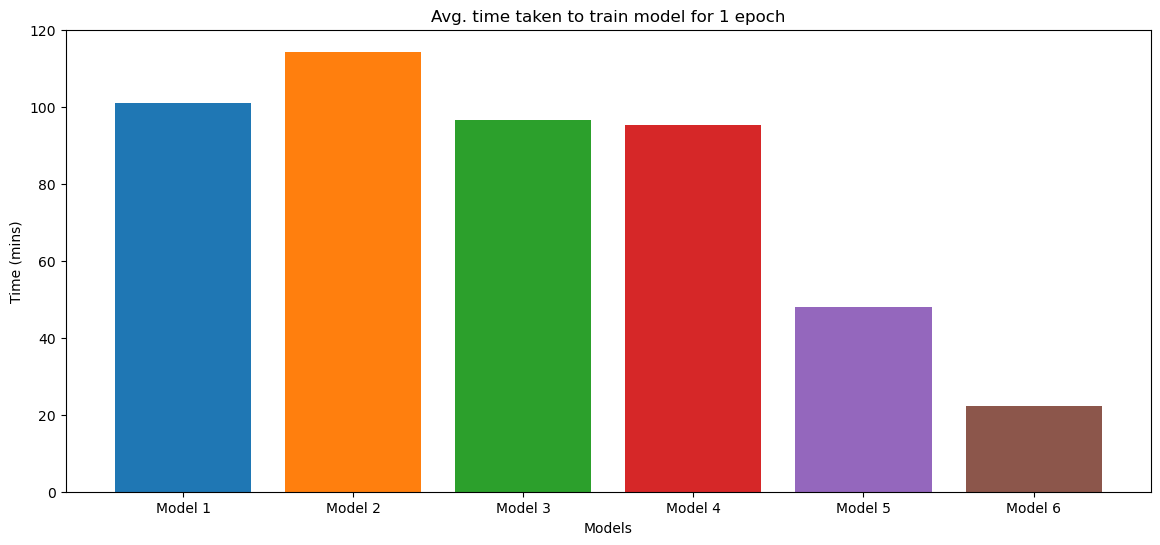

In [7]:
models_names = [f"Model {i}" for i in range(1, 7)]

plt.figure(figsize=(14, 6))
plt.bar(models_names, time, color=plt.cm.tab10.colors[:len(models_names)])
plt.title('Avg. time taken to train model for 1 epoch')
plt.xlabel('Models')
plt.ylabel('Time (mins)')
plt.show()